# Setup Notebook

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import numpy.linalg as nla
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import scipy
import re
import math
import six
from mlxtend.plotting import heatmap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [2]:
# Changing the format of the values visualization

pd.options.display.float_format = '{:.2f}'.format

# Reseting the maximum number of columns to display to default (all columns)

pd.set_option('display.max_columns', None)

# Importing Data

In [6]:
path = r'C:\Users\IVON6\Chocolate Bar Ratings Analysis'
df_clean_data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'flavor_of_cacao_clean.csv'))

# EXPLORING RELATIONSHIPS

In [9]:
# Print the first 5 rows
df_clean_data.head()

,Unnamed: 0,company,bar_name,reference_number,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin,Cocoa_Percent_Range
0,0,A. Morin,Agua Grande,1876,2016,63,France,3.75,Missing,Sao Tome,60-70%
1,1,A. Morin,Kpime,1676,2015,70,France,2.75,Missing,Togo,70-80%
2,2,A. Morin,Atsane,1676,2015,70,France,3.00,Missing,Togo,70-80%
3,3,A. Morin,Akata,1680,2015,70,France,3.50,Missing,Togo,70-80%
4,4,A. Morin,Quilla,1704,2015,70,France,3.50,Missing,Peru,70-80%


In [11]:
#drop unnamed column

df_clean_data.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
# Print the first 5 rows
df_clean_data.head()

,company,bar_name,reference_number,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin,Cocoa_Percent_Range
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,Missing,Sao Tome,60-70%
1,A. Morin,Kpime,1676,2015,70,France,2.75,Missing,Togo,70-80%
2,A. Morin,Atsane,1676,2015,70,France,3.00,Missing,Togo,70-80%
3,A. Morin,Akata,1680,2015,70,France,3.50,Missing,Togo,70-80%
4,A. Morin,Quilla,1704,2015,70,France,3.50,Missing,Peru,70-80%


In [15]:
#checking table size
df_clean_data.shape

(1795, 10)

In [17]:
# fill missing values (NaN) in DataFrame 
df_clean_data.ffill(inplace=True)

In [19]:
# Creating a separate dataframe to create correlations with numerical values only
df_clean_data_dub = df_clean_data[['company', 'bean_origin','company_location', 'reference_number', 'cocoa_percent', 'rating','review_date']].copy(deep=True)

In [21]:
df_clean_data_dub.dtypes

company              object
bean_origin          object
company_location     object
reference_number      int64
cocoa_percent         int64
rating              float64
review_date           int64
dtype: object

### Handling the Categorical columns

In [23]:
df_clean_data_analysis = df_clean_data_dub.copy
obj_cols = ['company','company_location','bean_origin']
df_clean_data_dub['company']= label_encoder.fit_transform(df_clean_data_dub['company'])
df_clean_data_dub['company_location']= label_encoder.fit_transform(df_clean_data_dub['company_location'])
df_clean_data_dub['bean_origin']= label_encoder.fit_transform(df_clean_data_dub['bean_origin'])

In [25]:
df_clean_data_dub.dtypes

company               int32
bean_origin           int32
company_location      int32
reference_number      int64
cocoa_percent         int64
rating              float64
review_date           int64
dtype: object

### Normalization Function

In [28]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

#### -- Normalize the dataset so as to distribute the data evenly

In [31]:
df_clean_data_dub.dtypes

company               int32
bean_origin           int32
company_location      int32
reference_number      int64
cocoa_percent         int64
rating              float64
review_date           int64
dtype: object

In [33]:
df_clean_data_normalize = normalize(df_clean_data_dub)
df_clean_data_normalize.head()

,company,bean_origin,company_location,reference_number,cocoa_percent,rating,review_date
0,0.00,0.70,0.32,0.96,0.36,0.69,0.91
1,0.00,0.80,0.32,0.86,0.48,0.44,0.82
2,0.00,0.80,0.32,0.86,0.48,0.50,0.82
3,0.00,0.80,0.32,0.86,0.48,0.62,0.82
4,0.00,0.57,0.32,0.87,0.48,0.62,0.82


In [35]:
# Creating a separate dataframe to create correlations
df_clean_data_copy = df_clean_data_normalize[['cocoa_percent', 'company_location']].copy(deep=True)

In [37]:
#creating correlation matrix with numerical values only
corr_matrix = df_clean_data_copy.corr()

In [39]:
corr_matrix.round(2)

,cocoa_percent,company_location
cocoa_percent,1.00,-0.02
company_location,-0.02,1.00


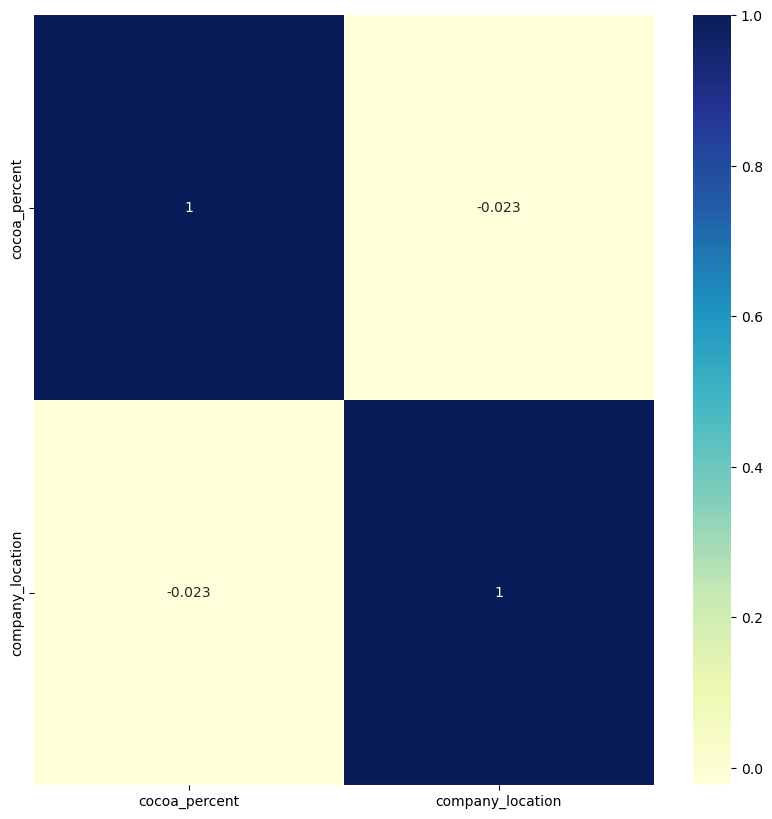

In [41]:
#creating correlation heatmap with unique colors for positive and negative correlations
#setup plot
f,ax = plt.subplots(figsize=(10,10))

#setup layout
corr_heat = sns.heatmap(corr_matrix, annot = True, ax = ax, cmap="YlGnBu")

In [43]:
# There is no correlation between the maker's location and cocoa percent, the quality of cocoa does not depend on the maker's location

In [45]:
# Creating a separate dataframe 
df = df_clean_data[['cocoa_percent', 'bean_type', 'rating']].copy(deep=True)

In [47]:
# Reduce the data frame to the key features: cocoa_percent & bean_type and label: rating
# Map the features with dummy categories for visualization

mapping_beans = {label: idx for idx, label in enumerate(np.unique(df.bean_type))}
mapping_label = {label: math.floor(label) - 1 for idx, label in enumerate(np.unique(df['rating']))}

df['cocoa_percent'] = df.cocoa_percent/100
df['bean_type'] = df.bean_type.map(mapping_beans)
df['rating'] = df.rating.map(mapping_label)

labels = ['rating']
features = ['cocoa_percent', 'bean_type']

df = df[labels+features]
print(df['rating'].value_counts())
df.head()

rating
2    1246
1     432
3      98
0      17
4       2
Name: count, dtype: int64


,rating,cocoa_percent,bean_type
0,2,0.63,30
1,1,0.70,30
2,2,0.70,30
3,2,0.70,30
4,2,0.70,30


In [49]:
# Shuffle the dataset
y = df['rating'].values
X = df[['bean_type', 'cocoa_percent']].values

np.random.seed(1234)

shuffle = np.random.permutation(np.arange(y.shape[0]))
X, y = X[shuffle], y[shuffle]

In [51]:
# Split by 60/20/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,
                                                    test_size=0.25, random_state=1234)

print('Size of X_train', X_train.shape)
print('Size of y_train', y_train.shape)
print('Size of X_val', X_val.shape)
print('Size of y_val', y_val.shape)
print('Size of X_test', X_test.shape)
print('Size of y_test', y_test.shape)

Size of X_train (1077, 2)
Size of y_train (1077,)
Size of X_val (359, 2)
Size of y_val (359,)
Size of X_test (359, 2)
Size of y_test (359,)


In [53]:
from sklearn.preprocessing import StandardScaler

scstd = StandardScaler()
X_train_std = scstd.fit(X_train).transform(X_train)
X_test_std = scstd.fit(X_train).transform(X_test)
X_val_std = scstd.fit(X_train).transform(X_val)

In [55]:
# Assemble a new dataframe for plotting
df_train = pd.concat(
    [pd.DataFrame(y_train), pd.DataFrame(X_train)],
    axis=1
)

df_train.columns=['rating', 'cocoa_percent', 'bean_type']

Text(0.5, 1.0, 'Heatmap of Correlations between \n Rating, bean_type and cocoa_percent\n')

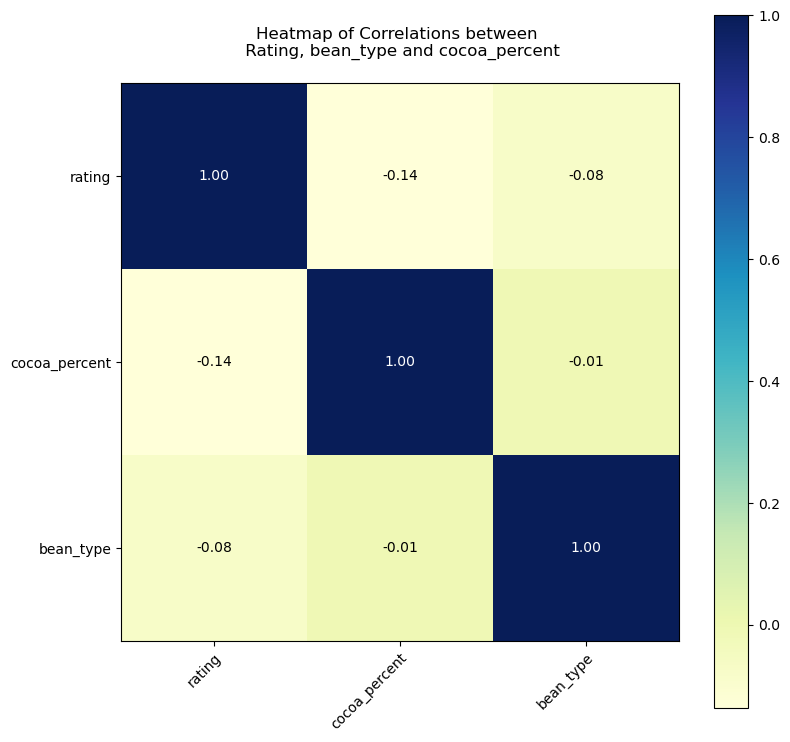

In [57]:
# Plot: heatmap to show the correlations
cm = df.corr().values


hm = heatmap(cm,
             row_names=df_train.columns,
             column_names=df_train.columns,
             cmap="YlGnBu",
             figsize=(9,9)
             )
plt.title('Heatmap of Correlations between \n Rating, bean_type and cocoa_percent\n')

# Insights: The correlation between the three variables are low, which indicates
# low correlation.

### Is the cacao bean's origin an indicator of quality?

In [60]:
# Creating new dataframe grouping bean_origin, avg_rating, and n_rating
df_avg = df_clean_data_normalize.groupby('bean_origin', as_index=False).agg(avg_rating=('rating', 'mean'),
                                                       n_rating=('rating', 'count'))

# Separate dataframe for n_ratings 20 or greater
over_20 = df_avg[df_avg['n_rating'] >= 20].sort_values('n_rating', ascending=False, ignore_index=True)

over_20.head()

,bean_origin,avg_rating,n_rating
0,0.86,0.56,214
1,0.22,0.53,193
2,0.18,0.55,166
3,0.57,0.53,165
4,0.46,0.57,146


In [62]:
#creating correlation matrix with numerical values only
corr_matrix1 = df_avg.corr()

In [64]:
corr_matrix1.round(2)

,bean_origin,avg_rating,n_rating
bean_origin,1.00,0.06,-0.12
avg_rating,0.06,1.00,-0.02
n_rating,-0.12,-0.02,1.00


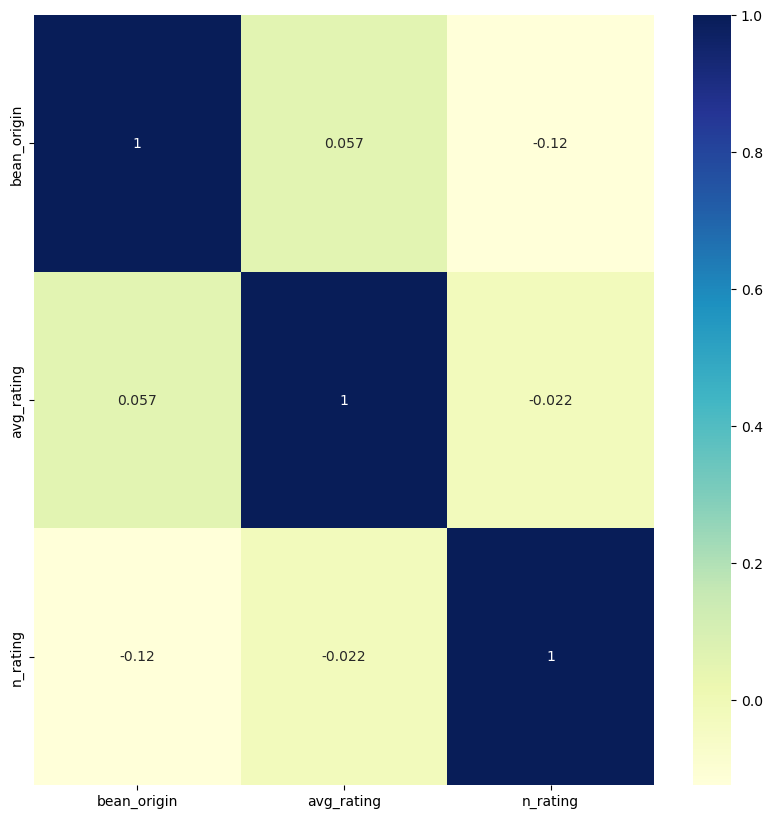

In [66]:
#creating correlation heatmap with unique colors for positive and negative correlations
#setup plot
f,ax = plt.subplots(figsize=(10,10))

#setup layout
corr_heat = sns.heatmap(corr_matrix1, annot = True, ax = ax, cmap="YlGnBu")

In [68]:
# It does not appear that the cacao bean's origin is an indicator of quality. 
# A weak negative correlation exists between the average rating and the number of ratings; indicates that as the number of ratings increases, the average rating decreases.

Text(0.5, 1.0, 'Correlation Matrix')

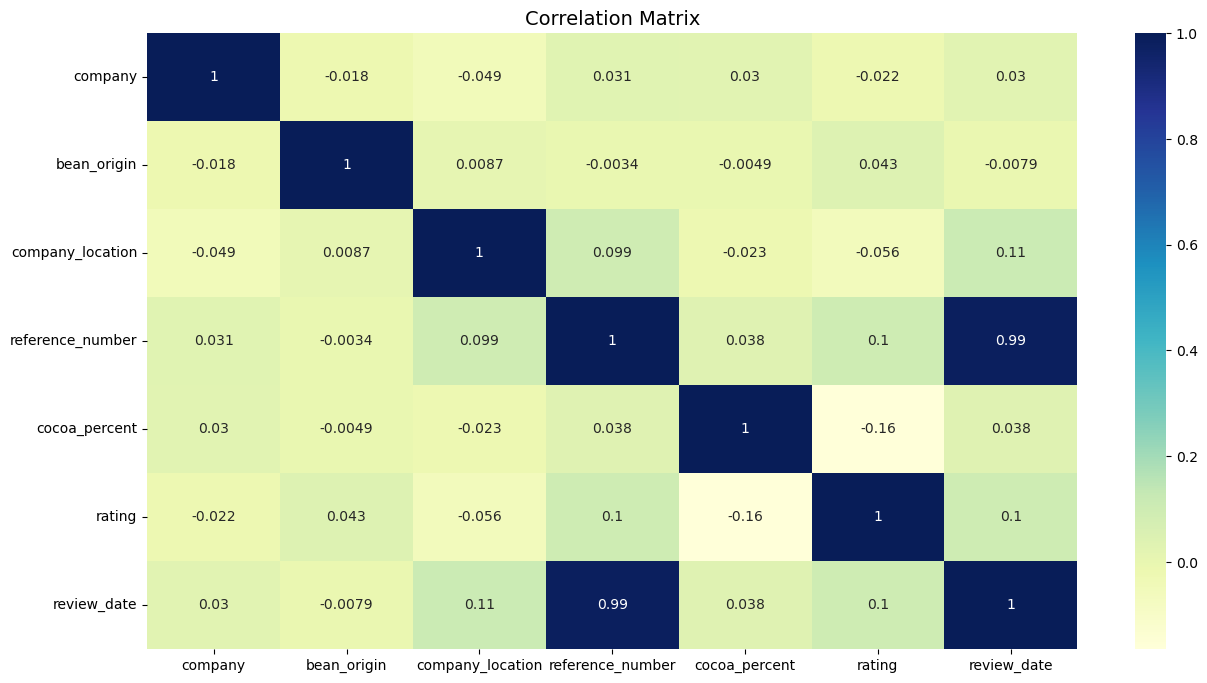

In [72]:
plt.figure(figsize=(15,8))
ans = df_clean_data_normalize.corr()
sns.heatmap(ans,annot=True,cmap="YlGnBu")
plt.title('Correlation Matrix', fontsize=14)

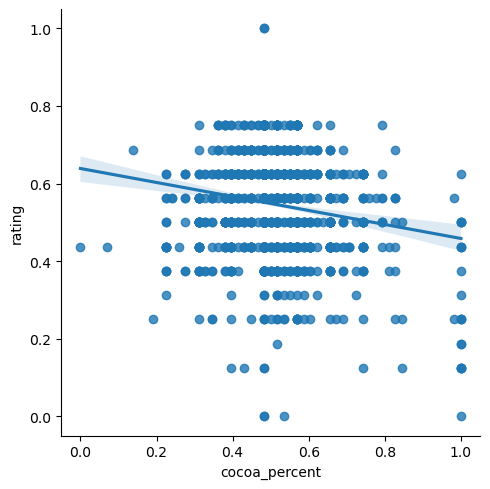

In [74]:
# Scatter plot showing relationship between cocoa flavour percentage and Ratings

sns.lmplot(x = 'cocoa_percent', y = 'rating', data = df_clean_data_normalize)

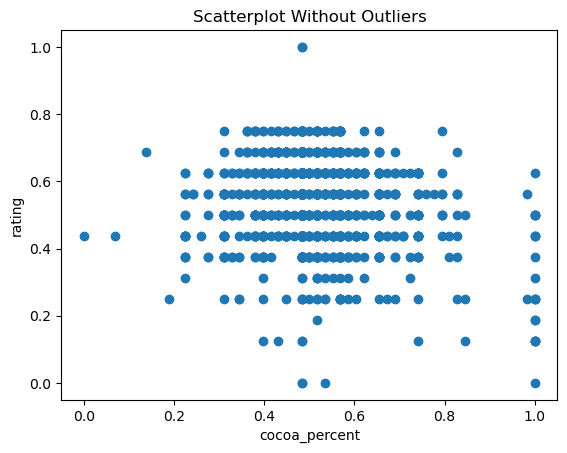

In [76]:
#scatterplot pieces without outliers and minifigs
scat2 = plt.scatter(x = 'cocoa_percent', y = 'rating', data = df_clean_data_normalize)
plt.xlabel('cocoa_percent')
plt.ylabel('rating')
plt.title('Scatterplot Without Outliers')
plt.show()

In [78]:
# Both scatterplots
# While there is a general negative relationship between these two columns, there are still quite a few points that don’t correspond with the trend.
# there is a weak negative relationship, the trend line isn’t very steep, and there are many points away from this line. 
# In this case, there’s a great degree of variability 

# Pair Plot

In [81]:
# Keep only the variables you want to use in the pair plot

sub_2 = df_clean_data_normalize[['company', 'bean_origin', 'company_location', 'cocoa_percent', 'rating']]

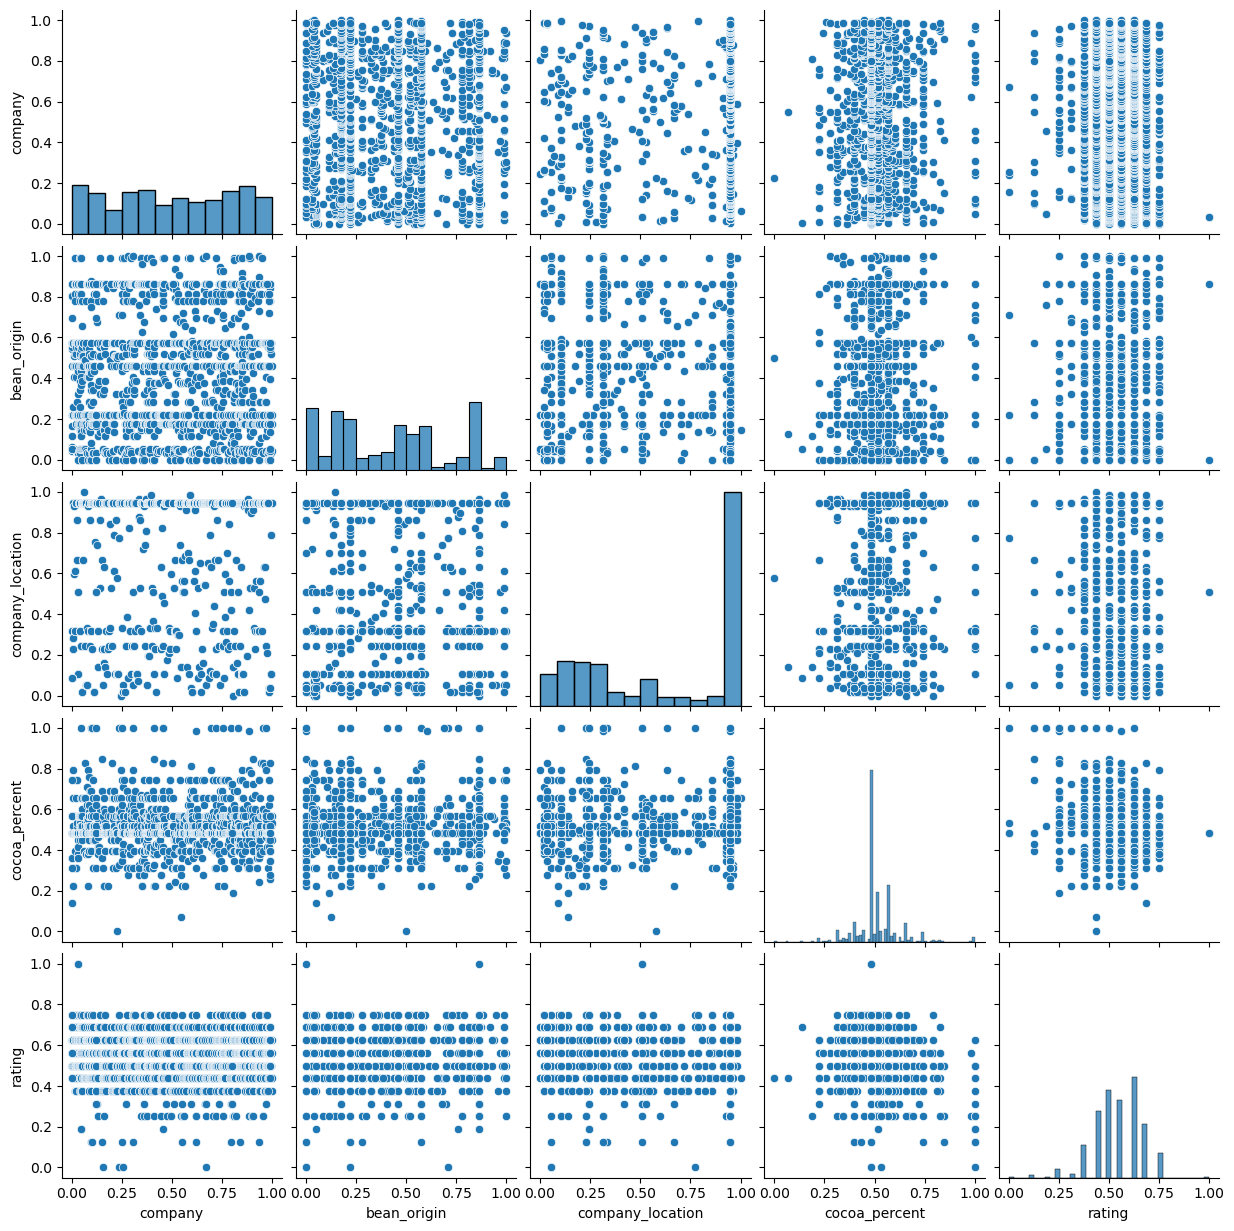

In [83]:
# Create a pair plot 

g = sns.pairplot(sub_2)

In [85]:
# company, bean_origin, company_location and cocoa_percent seems to not have a linear correlation or strong correlation
# I should further investigate, if the maker_location infleunce in the ratings and quality of the cocoa beans

# Categorical Plots

<Axes: ylabel='Count'>

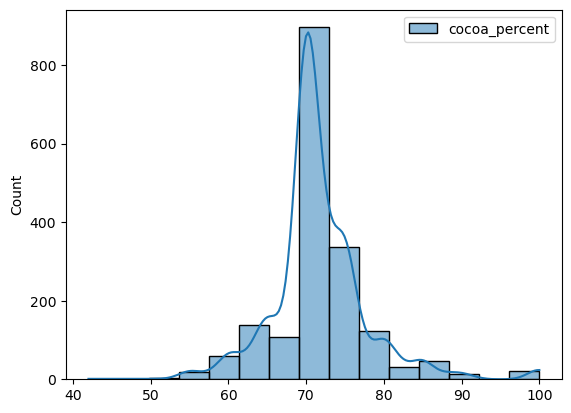

In [88]:
percentage_of_cocoa_hist = df_clean_data.sort_values('cocoa_percent', ascending=False)[['cocoa_percent']]
sns.histplot(percentage_of_cocoa_hist, bins=15, kde = True)

In [90]:
df_clean_data.loc[df_clean_data['cocoa_percent'] < 49, 'Cocoa category'] = 'Less cacao solids'

In [92]:
df_clean_data.loc[(df_clean_data['cocoa_percent'] >= 49) & (df_clean_data['cocoa_percent'] < 70), 'Cocoa category'] = 'Medium cacao solids'

In [94]:
df_clean_data.loc[df_clean_data['cocoa_percent'] >= 70, 'Cocoa category'] = 'High cacao solids'

In [96]:
df_clean_data['Cocoa category'].value_counts(dropna = False)

Cocoa category
High cacao solids      1467
Medium cacao solids     326
Less cacao solids         2
Name: count, dtype: int64

In [98]:
df_clean_data.columns

Index(['company', 'bar_name', 'reference_number', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'bean_origin', 'Cocoa_Percent_Range', 'Cocoa category'],
      dtype='object')

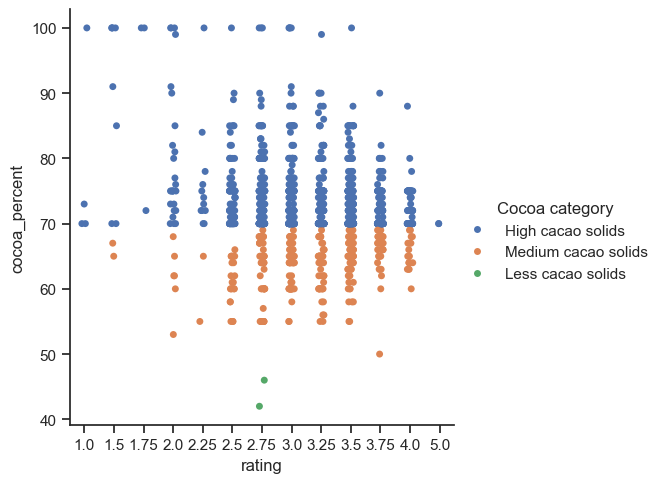

In [100]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="rating", y="cocoa_percent", hue="Cocoa category", data=df_clean_data)

In [102]:
# Higher percentages – chocolates with more cacao solids are darker, have a stronger flavour, and have less sugar. 
# Medium percentages - This range is suitable for those who like the flavour of milk chocolate but want a darker and less sweet taste.
# Lower percentages – chocolates with less cacao solids are lighter, milder, and have more sugar. 

In [108]:
# there are no relevance that the cocoa percentages influence on the ratings.

In [110]:
df_clean_data_normalize.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_clean_data_normalize.csv'))